# A Tutorial on LASSO Regression

### Created by Sebastian Lopez

## Least absolute shrinkage and selection operator (LASSO)

LASSO and Linear regression are very similar so we will first go over the inner workings of Linear regression to be able to understand LASSO. 

In [144]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,LassoCV
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## Linear Regression

Linear Regression, also known as the Least Squares Fit, is a commonly used routine to fit a line to data where you assume a linear relationship between inputs and outputs.

The rundown of the routine is as follows:
1. Draw a line with guess parameters (y-intercept and slope)
2. Measure the distance between the data points and the prediction from the line (residuals).
3. Square each of the residuals and add them up
4. Repeat until optimal fit is found which will have the least sum of squares.

An example of this is shown below.

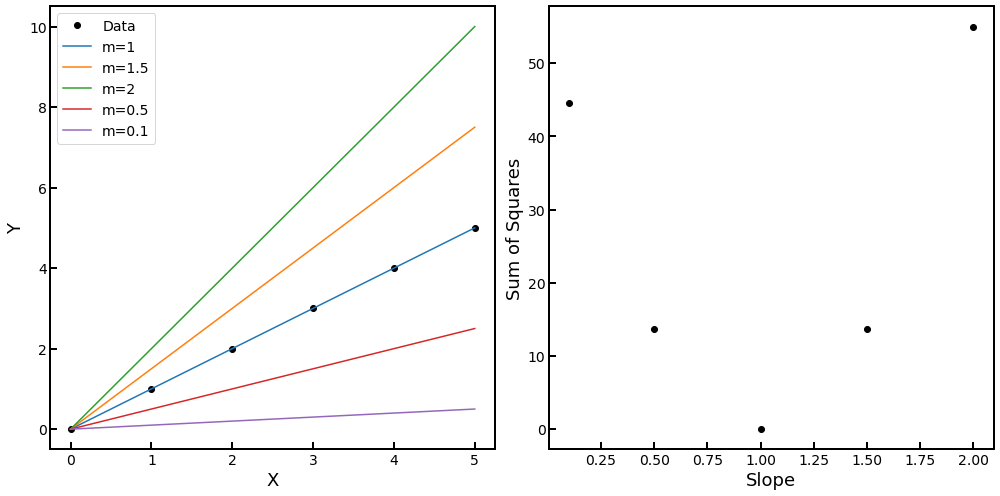

In [145]:
x = np.array([0,1,2,3,4,5])
y = np.array([0,1,2,3,4,5])

def line(x,m,b=0):
    return b+x*m

def lsq(y,yfit):
    res = yfit-y
    sqr = res*res
    SSQ = np.sum(sqr)
    return SSQ

y1 = line(x,1)
y15= line(x,1.5)
y2 = line(x,2)
y05= line(x,0.5)
y01= line(x,0.1)

lsq1 = lsq(y,y1)
lsq15= lsq(y,y15)
lsq2 = lsq(y,y2)
lsq05 = lsq(y,y05)
lsq01 = lsq(y,y01)

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(14,7))
ax1.plot(x,y,'ko',label='Data')
ax1.plot(x,y1,label='m=1')
ax1.plot(x,y15,label='m=1.5')
ax1.plot(x,y2,label='m=2')
ax1.plot(x,y05,label='m=0.5')
ax1.plot(x,y01,label='m=0.1')
ax1.set_xlabel('X',fontsize=18)
ax1.set_ylabel('Y',fontsize=18)
ax1.legend(fontsize=14)
for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(2)
ax1.tick_params(width=2,direction='in',length=7, labelsize=14)
    
    
ax2.plot(0.1,lsq01,'ko')
ax2.plot(0.5,lsq05,'ko')
ax2.plot(1,lsq1,'ko')
ax2.plot(1.5,lsq15,'ko')
ax2.plot(2,lsq2,'ko')
ax2.set_xlabel('Slope',fontsize=18)
ax2.set_ylabel('Sum of Squares',fontsize=18)

for axis in ['top','bottom','left','right']:
    ax2.spines[axis].set_linewidth(2)
ax2.tick_params(width=2,direction='in',length=7, labelsize=14)
plt.tight_layout()
plt.show()

A shorter way of implementing linear regression is to take advantage of a module like $scikit\:learn$ which has linear regression models built into it.

In [146]:
x = np.array([0,1,2,3,4,5]).reshape((-1, 1))
y = np.array([0,1,2,3,4,5])
lin_model = LinearRegression().fit(x,y)
print('The y-intercept of the best fit line is:',lin_model.intercept_)
print('The slope of the best fit line is:',lin_model.coef_)

The y-intercept of the best fit line is: 0.0
The slope of the best fit line is: [1.]


## LASSO Regression

In Linear regression our goal was to minimize the sum of the square residuals:
$$
\Sigma_i (y_i-y_{fit,i})^2
$$

In the case of LASSO regression our goal is to minimize the sum of the square residuals plus a penalty:
$$
\Sigma_i  (y_i-y_{fit,i})^2 + \lambda\Sigma_i|m|
$$

The penalty in LASSO regression is a constant $\lambda$ that can range from 0 to $\infty$ multiplied by the absolute value of the regression coefficient which in the linear case is just the slope. Adding a penalty is known as shrinkage and what it does is minimize the size of the coefficients and in some cases make them zero altogether. The capability of making certain parameters zero, therefore excluding them from the model, is where the selection part of the LASSO acronym comes in. LASSO regression is quite useful when you are testing out models and want to know what parameters are irrelevant and it is also performs well when your number of parameters exceeds the number of data points. 

To find the optimal $\lambda$ we implement cross validation. Cross validation in this setting is when the data is randomly split into n number of groups and each group is used to find the optimal parameters. In the case of LASSO regression for each group the routine will search for the optimal lambda that will minimize the sum of the square residuals plus the penalty. One of the most common cross validation routines is when your $n=10$ and this is called 10-fold cross validation.

## When not to use LASSO

LASSO regression works best in situations where there are a lot of parameters and can sometimes worsen fits in situations where a simpler routine would work.

In the example below we create a random regression problem with the $scikit\:learn$ function $make\_regression$. The X and Y data points have a linear relationship with some gaussian noise added to them. 

In the context of machine learning which $scikit\:learn$ is made for, we don't want to find the optimal parameters by using all our data. Instead it is necessary to split the data into training data where the optimal parameters are found and testing data where we judge how well the model works. 

When we fit the data using both Linear and LASSO regression we find that each routine produces results that are practically identical.

In [147]:
x, y = make_regression(n_samples=500, n_features=1, noise=15 )

In [148]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state = 2)
lin_model = LinearRegression().fit(xtrain,ytrain)
lin_slope = lin_model.coef_
lin_int   = lin_model.intercept_
lin_ypred = lin_model.predict(xtest)
linr2 = r2_score(ytest,lin_ypred)
print('The R^2 for linear regression is:',linr2)

lasso_cv_model = LassoCV( cv = 10, max_iter = 100000).fit(xtrain,ytrain)
lasso_slope = lasso_cv_model.coef_
lasso_int   = lasso_cv_model.intercept_
lasso_ypred = lasso_cv_model.predict(xtest)
lassor2 = r2_score(ytest,lasso_ypred)
print('The lambda parameter for Lasso regression is:',lasso_cv_model.alpha_)
print('The R^2 for Lasso regression is:',lassor2)

The R^2 for linear regression is: 0.9393936135786412
The lambda parameter for Lasso regression is: 0.06712837335005802
The R^2 for Lasso regression is: 0.9394443402307037


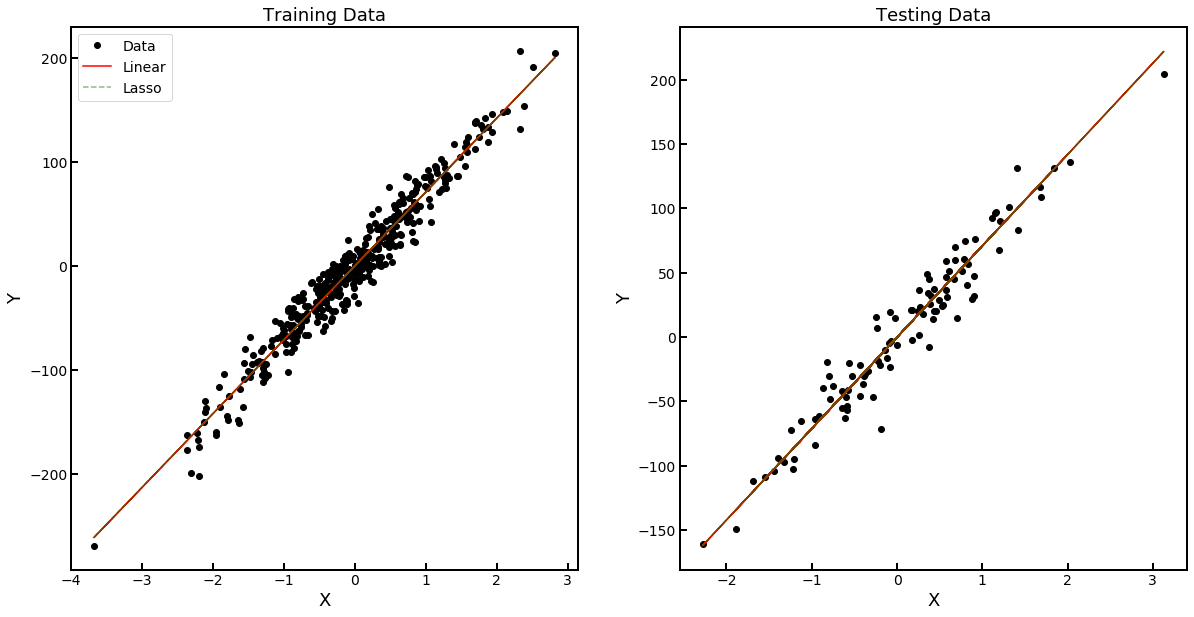

In [149]:
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(20,10))
ax1.plot(xtrain,ytrain,'ko',label='Data')
ax1.plot(xtrain,line(xtrain,lin_slope,b=lin_int),'r-',label='Linear')
ax1.plot(xtrain,line(xtrain,lasso_slope,b=lasso_int),'g--',label='Lasso',alpha=0.5)
ax1.set_xlabel('X',fontsize=18)
ax1.set_ylabel('Y',fontsize=18)
ax1.set_title('Training Data',fontsize=18)
ax1.legend(fontsize=14)
for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(2)
ax1.tick_params(width=2,direction='in',length=7, labelsize=14)


ax2.plot(xtest,ytest,'ko',label='Data')
ax2.plot(xtest,line(xtest,lin_slope,b=lin_int),'r-')
ax2.plot(xtest,line(xtest,lasso_slope,b=lasso_int),'g--',alpha=0.5)
ax2.set_title('Testing Data',fontsize=18)
ax2.set_xlabel('X',fontsize=18)
ax2.set_ylabel('Y',fontsize=18)
for axis in ['top','bottom','left','right']:
    ax2.spines[axis].set_linewidth(2)
ax2.tick_params(width=2,direction='in',length=7, labelsize=14)

## When LASSO is Useful

LASSO regression is better idea when there are more than just a couple of parameters to fit.

In the example below we analyse California housing data from the 1990 US Census (from the StatLib repository https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html). The data is for several census blocks which can range from 600 to 3000 peoples and the columns from left to right are median income, median house age, average number of rooms per household, average number of bedrooms per household, population, average number of household members, and the latitude and longitude of the census block. These parameters are all used in this case to predict the median house value for each census block. 

To provide an obvious parameter that should be excluded from the final model, I added a column of fake data which is the number of dogs per household. The LASSO regression routine should in theory be able to make the regression coefficient for the dog data be zero.

In [150]:
from sklearn.datasets import fetch_california_housing
h = fetch_california_housing()
house_price = (h.target)
data = h.data
dogs = np.random.randint(0,3,size=house_price.shape).reshape((house_price.shape[0],1))
data = np.concatenate((data,dogs),axis=1)

In [151]:
xtrain, xtest, ytrain, ytest = train_test_split(data,house_price, test_size = 0.2,shuffle=2)

lin_model = LinearRegression().fit(xtrain,ytrain)
print('The Linear Regression coefficients are:')
print(lin_model.coef_)

lin_ypred = lin_model.predict(xtest)
linr2 = r2_score(ytest,lin_ypred)
print('The R^2 for linear regression is:',linr2)

lasso_cv_model = LassoCV(alphas = None, cv = 10, max_iter = 100000).fit(xtrain,ytrain)
print('The LASSO Regression coefficients are:')
print(lasso_cv_model.coef_)

lasso_ypred = lasso_cv_model.predict(xtest)
lassor2 = r2_score(ytest,lasso_ypred)
print('The lambda parameter for Lasso regression is:',lasso_cv_model.alpha_)
print('The R^2 for Lasso regression is:',lassor2)

The Linear Regression coefficients are:
[ 4.43221962e-01  9.27320020e-03 -1.22671835e-01  7.78977300e-01
 -3.69284227e-06 -4.09469132e-03 -4.21056674e-01 -4.37216411e-01
  4.20176678e-03]
The R^2 for linear regression is: 0.5939309002290676
The LASSO Regression coefficients are:
[ 3.79855506e-01  1.11949934e-02  1.21731314e-03  0.00000000e+00
  1.63015703e-06 -3.75261929e-03 -3.30981980e-01 -3.33252753e-01
  0.00000000e+00]
The lambda parameter for Lasso regression is: 0.03423355875529053
The R^2 for Lasso regression is: 0.5928076269003355


After running both the Linear and LASSO regression we can see that the LASSO regression routine did in fact make the coefficient for the dog data zero. Not only that it also determined that the average number of bedrooms per household is a parameter that can be ignored. Linear regression on the other hand still keeps in the dog and average bedroom data because it does not have the capability of selector model parameters.

## LASSO Regression Takeaways

LASSO Regression is routine that aims to minimize regression coefficients using the sum of squared residuals plus a penalty. 

The routine can also perform feature selection by setting unused regression coefficients to zero thereby simplifying models.

As a result LASSO Regression is best suited for models with several parameters and should not be used in cases where a simpler routine like Linear Regression would suffice.

LASSO Regression should also not be used if you want to keep all the parameters in your model. In the case where you want to minimize regression coefficients near the extent of LASSO regression you can opt to use Ridge Regression where coefficients only get asymptotically close to zero.